In [4]:
import json 
import numpy as np
from scipy import stats
from hypyp import stats 
'''
Comparing inter-connectivity to random signal
'''

f = open('cross_freq_results.json')

# returns JSON object as 
# a dictionary
results = json.load(f)
  
# Iterating through the json
# list
fp1 = []
sf1 = []
fp2 = []
sf2 = []
reunion = []

all_stages = [fp1, sf1, fp2, sf2, reunion]
for part, data in results.items():
    for stage, bands in data.items():
        stage = stage[1]
        all_stages[int(stage)-1].append(bands)

fp1_theta = []
fp1_alpha = []
sf1_theta = []
sf1_alpha = []
fp2_theta = []
fp2_alpha = []
sf2_theta = []
sf2_alpha = []
ru_theta = []
ru_alpha = []
for part1, part2, part3, part4, part5 in zip(fp1, sf1, fp2, sf2, reunion):
    fp1_theta.append(np.mean(part1['theta']))
    fp1_alpha.append(np.mean(part1['alpha']))
    sf1_theta.append(np.mean(part2['theta']))
    sf1_alpha.append(np.mean(part2['alpha']))
    fp2_theta.append(np.mean(part3['theta']))
    fp2_alpha.append(np.mean(part3['alpha']))
    sf2_theta.append(np.mean(part4['theta']))
    sf2_alpha.append(np.mean(part4['alpha']))
    ru_theta.append(np.mean(part5['theta']))
    ru_alpha.append(np.mean(part5['alpha']))


data_theta =[fp1_theta, sf1_theta, fp2_theta, sf2_theta, ru_theta]
data_alpha = [fp1_alpha, sf1_alpha, fp2_alpha, sf2_alpha, ru_alpha] 

# Closing file
f.close()

In [5]:
import json 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from hypyp import stats 

f = open('results_theta.json')

# returns JSON object as 
# a dictionary
results = json.load(f)
  
# Iterating through the json
# list
fp1_theta = []
sf1_theta = []
fp2_theta = []
sf2_theta = []

all_stages = [fp1_theta, sf1_theta, fp2_theta, sf2_theta]
for part, stages in results.items():
    if part == '802' or part == '623':
        continue
    else:
        for stage, data in stages.items():
            stage = int(stage[1]) - 1
            if stage == 4:
                continue
            all_stages[stage].append(np.nanmean(data))

sf2_theta = [0 if str(x) == 'nan' else x for x in sf2_theta]

data_theta = [fp1_theta, sf1_theta, fp2_theta, sf2_theta] 
data_theta = [np.array(x) for x in data_theta]

for i in data_theta:
    print(i.shape)
f.close()

(33,)
(33,)
(33,)
(33,)


/tmp/ipykernel_5666/3251939760.py:29: RuntimeWarning: Mean of empty slice
  all_stages[stage].append(np.nanmean(data))


In [6]:
f = open('results_alpha.json')

# returns JSON object as 
# a dictionary
results = json.load(f)
  
# Iterating through the json
# list
fp1_alpha = []
sf1_alpha = []
fp2_alpha = []
sf2_alpha = []

all_stages = [fp1_alpha, sf1_alpha, fp2_alpha, sf2_alpha]
for part, stages in results.items():
    if part == '802' or part == '623':
        continue
    else:
        for stage, data in stages.items():
            stage = int(stage[1]) - 1
            if stage == 4:
                continue
            all_stages[stage].append(np.nanmean(data))

sf2_alpha = [0 if str(x) == 'nan' else x for x in sf2_alpha]

data_alpha = [np.array(fp1_alpha), np.array(sf1_alpha), np.array(fp2_alpha), np.array(sf2_alpha)] 

/tmp/ipykernel_5666/3115508069.py:23: RuntimeWarning: Mean of empty slice
  all_stages[stage].append(np.nanmean(data))


## Testing for Normal Distribution

In [42]:
import pandas as pd
import pingouin as pg
from statsmodels.stats.anova import AnovaRM
from scipy.stats import shapiro

# Load data
df = pd.DataFrame({"FreePlay1": fp1_theta,
                  "StillFace1": sf1_theta,
                  "FreePlay2": fp2_theta,
                  "StillFace2": sf2_theta,
                  })


# Create a multi-indexed dataframe
df_melted_theta = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['FreePlay1', 'StillFace1', 'FreePlay2', 'StillFace2'])

# Rename columns
df_melted_theta.columns = ['id', 'Condition', 'Synchrony']

stat, p = shapiro(df_melted_theta["Synchrony"])

print("Test statistic:", stat)
print("p-value:", p)

Test statistic: 0.2763937711715698
p-value: 1.0487583879664022e-22


In [8]:
import pandas as pd
import pingouin as pg
from scipy.stats import shapiro

# Load data
df = pd.DataFrame({"FreePlay1": fp1_alpha,
                  "StillFace1": sf1_alpha,
                  "FreePlay2": fp2_alpha,
                  "StillFace2": sf2_alpha,
                  })


# Create a multi-indexed dataframe
df_melted_alpha = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['FreePlay1', 'StillFace1', 'FreePlay2', 'StillFace2'])

# Rename columns
df_melted_alpha.columns = ['id', 'Condition', 'Synchrony']

stat, p = shapiro(df_melted_alpha["Synchrony"])

print("Test statistic:", stat)
print("p-value:", p)


Test statistic: 0.3265722990036011
p-value: 5.087002742584586e-22


## Fisher Z-transform

In [35]:
# Perform the Fisher z-transform
z_fp1_theta = np.arctanh(fp1_theta)
z_sf1_theta = np.arctanh(sf1_theta)
z_fp2_theta = np.arctanh(fp2_theta)
z_sf2_theta = np.arctanh(sf2_theta)

# Load data
df = pd.DataFrame({"FreePlay1": z_fp1_theta,
                  "StillFace1": z_sf1_theta,
                  "FreePlay2": z_fp2_theta,
                  "StillFace2": z_sf2_theta,
                  })


# Create a multi-indexed dataframe
df_melted_z = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['FreePlay1', 'StillFace1', 'FreePlay2', 'StillFace2'])

# Rename columns
df_melted_z.columns = ['id', 'Condition', 'Synchrony']

stat, p = shapiro(df_melted_z["Synchrony"])

print("Test statistic:", stat)
print("p-value:", p)

Test statistic: 0.30818986892700195
p-value: 2.8235139235966055e-22


In [57]:
# Perform the Fisher z-transform
z_fp1_alpha = np.arctanh(fp1_alpha)
z_sf1_alpha = np.arctanh(sf1_alpha)
z_fp2_alpha = np.arctanh(fp2_alpha)
z_sf2_alpha = np.arctanh(sf2_alpha)


# Load data
df = pd.DataFrame({"FreePlay1": z_fp1_alpha,
                  "StillFace1": z_sf1_alpha,
                  "FreePlay2": z_fp2_alpha,
                  "StillFace2": z_sf2_alpha,
                  })


# Create a multi-indexed dataframe
df_melted_z = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['FreePlay1', 'StillFace1', 'FreePlay2', 'StillFace2'])

# Rename columns
df_melted_z.columns = ['id', 'Condition', 'Synchrony']

stat, p = shapiro(df_melted_z["Synchrony"])

print("Test statistic:", stat)
print("p-value:", p)

Test statistic: 0.3388518691062927
p-value: 7.590223740096591e-22


## Friedman Test
The null hypothesis (H0): The mean for each population is equal.

The alternative hypothesis: (Ha): At least one population mean is different from the rest.

https://www.statology.org/friedman-test-python/

### theta

In [62]:
# Perform Friedman test
pg.friedman(data=df_melted_theta, dv='Synchrony', within='Condition', subject = 'id')

,Source,W,ddof1,Q,p-unc
Friedman,Condition,0.176492,3,17.472727,0.000565


In [40]:
#perform Friedman Test      
from scipy.stats import friedmanchisquare
f_value, p_value = friedmanchisquare(fp1_theta, sf1_theta, fp2_theta, sf2_theta)

print("Friedman test results:")
print(f"    F-value: {f_value}")
print(f"    p-value: {p_value}")

Friedman test results:
    F-value: 17.472727272727298
    p-value: 0.0005649004704665209


### Post hoc test - theta

In [75]:
import scikit_posthocs as sp
post_hoc_wilcoxon_theta = sp.posthoc_wilcoxon(a = df_melted_theta, val_col = "Synchrony", group_col = "Condition", p_adjust = 'bonferroni')
post_hoc_wilcoxon_theta

,FreePlay1,StillFace1,FreePlay2,StillFace2
FreePlay1,1.000000,0.001133,1.000000,0.007123
StillFace1,0.001133,1.000000,0.000373,1.000000
FreePlay2,1.000000,0.000373,1.000000,0.002235
StillFace2,0.007123,1.000000,0.002235,1.000000


In [60]:
post_hoc_wilcoxon_theta = sp.posthoc_nemenyi_friedman(a = df_melted_theta, val_col = "Synchrony", group_col = "Condition", p_adjust = 'bonferroni')
post_hoc_wilcoxon_theta

TypeError: posthoc_nemenyi_friedman() got an unexpected keyword argument 'val_col'

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FreePlay1 v.s. StillFace1: Custom statistical test, P_val:1.133e-03
StillFace1 v.s. FreePlay2: Custom statistical test, P_val:3.730e-04
FreePlay2 v.s. StillFace2: Custom statistical test, P_val:2.235e-03
FreePlay1 v.s. StillFace2: Custom statistical test, P_val:7.123e-03


(<AxesSubplot: xlabel='Condition', ylabel='Synchrony'>,
  <statannot.StatResult.StatResult at 0x7ff538c7e650>])

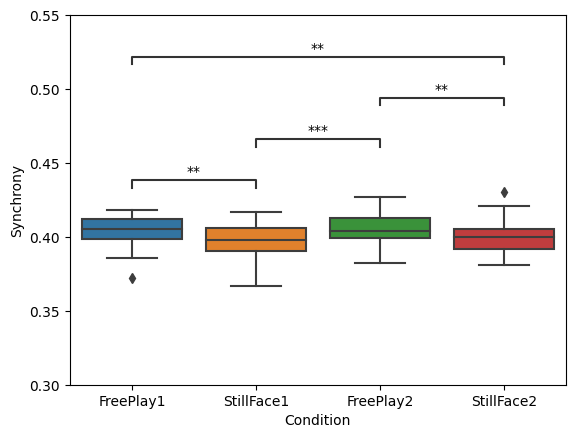

In [52]:
import seaborn as sns
from statannot import add_stat_annotation

ax = sns.boxplot(data = df_melted_theta, x = 'Condition', y = 'Synchrony')
ax.set(ylim=(0.3, 0.55))
add_stat_annotation(ax, data = df_melted_theta, x = 'Condition', y = 'Synchrony', 
                    box_pairs = [('FreePlay1', 'StillFace1'), ('FreePlay1', 'StillFace2'),  ('StillFace1', 'FreePlay2'), ('FreePlay2', 'StillFace2'),],
                    perform_stat_test=False,
                    text_format = 'star',
                     pvalues = [0.001133, 0.007123, 0.000373, 0.002235],
                     verbose=2)

Wilcoxon Rank-Sum Test
Statistic: 337.0, p-value: 9.293054962581833e-07
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FreePlay v.s. StillFace: Custom statistical test, P_val:9.293e-07


(<AxesSubplot: xlabel='Condition', ylabel='Synchrony'>,
 [<statannot.StatResult.StatResult at 0x7ff538ec71c0>])

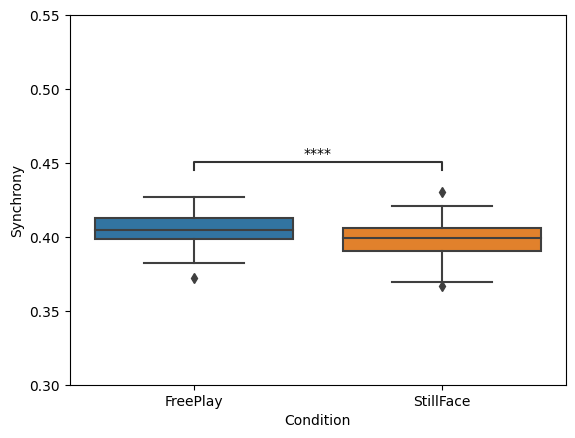

In [47]:
from scipy.stats import wilcoxon
import seaborn as sns
from statannot import add_stat_annotation

df1 = pd.DataFrame({"FreePlay": fp1_theta + fp2_theta,
                  "StillFace": sf1_theta + sf2_theta
                  })


# Create a multi-indexed dataframe
df_melted_t = pd.melt(df1.reset_index(), id_vars=['index'], value_vars=['FreePlay', 'StillFace'])

# Rename columns
df_melted_t.columns = ['id', 'Condition', 'Synchrony']

res = wilcoxon(fp1_theta + fp2_theta, sf1_theta + sf2_theta, correction = True)
print("Wilcoxon Rank-Sum Test")
print(f"Statistic: {res.statistic}, p-value: {res.pvalue}")

ax = sns.boxplot(data = df_melted_t, x = 'Condition', y = 'Synchrony')
ax.set(ylim=(0.3, 0.55))
add_stat_annotation(ax, data = df_melted_t, x = 'Condition', y = 'Synchrony', 
                    box_pairs = [('FreePlay', 'StillFace')],
                    perform_stat_test=False,
                    text_format = 'star',
                    pvalues = [9.293054962581833e-07]
                    )

### alpha

In [29]:
# Perform Friedman test
pg.friedman(data=df_melted_alpha, dv='value', within='condition', subject = 'id')

,Source,W,ddof1,Q,p-unc
Friedman,condition,0.072911,3,7.218182,0.065259


In [30]:
friedmanchisquare(fp1_alpha, sf1_alpha, fp2_alpha, sf2_alpha)

FriedmanchisquareResult(statistic=7.21818181818179, pvalue=0.06525932279522308)

In [59]:
import scikit_posthocs as sp

post_hoc_wilcoxon_alpha = sp.posthoc_wilcoxon(a = df_melted_alpha, val_col = "Synchrony", group_col = "Condition", p_adjust = 'bonferroni')
post_hoc_wilcoxon_alpha

,FreePlay1,StillFace1,FreePlay2,StillFace2
FreePlay1,1.000000,0.391318,1.000000,0.232448
StillFace1,0.391318,1.000000,0.232448,1.000000
FreePlay2,1.000000,0.232448,1.000000,1.000000
StillFace2,0.232448,1.000000,1.000000,1.000000


In [68]:
res = wilcoxon(fp1_alpha + fp2_alpha, sf1_alpha + sf2_alpha)
print("Wilcoxon Rank-Sum Test")
print(f"Statistic: {res.statistic}, p-value: {res.pvalue}")

Wilcoxon Rank-Sum Test
Statistic: 732.0, p-value: 0.01703514353396015


Using zero_method  wilcox
FreePlay1 v.s. StillFace1: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.609e-01 stat=1.770e+02
Using zero_method  wilcox
StillFace1 v.s. FreePlay2: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.550e-01 stat=1.650e+02
Using zero_method  wilcox
FreePlay2 v.s. StillFace2: Wilcoxon test (paired samples) with Bonferroni correction, P_val=7.307e-01 stat=2.050e+02
Using zero_method  wilcox
FreePlay1 v.s. StillFace2: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.550e-01 stat=1.650e+02


(<AxesSubplot: xlabel='Condition', ylabel='Synchrony'>,
  <statannot.StatResult.StatResult at 0x7ff538b4f850>])

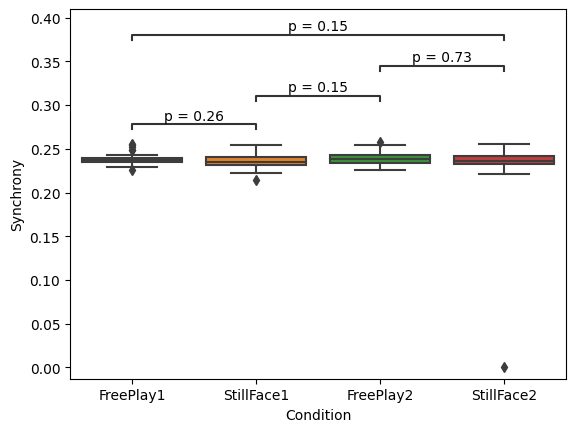

In [53]:
ax = sns.boxplot(data = df_melted_alpha, x = 'Condition', y = 'Synchrony')
# ax.set(ylim=(0.3, 0.55))
add_stat_annotation(ax, data = df_melted_alpha, x = 'Condition', y = 'Synchrony', 
                    box_pairs = [('FreePlay1', 'StillFace1'), ('FreePlay1', 'StillFace2'),  ('StillFace1', 'FreePlay2'), ('FreePlay2', 'StillFace2')],
                    perform_stat_test=True,
                    test = 'Wilcoxon',
                    text_format = 'simple',
                    )

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FreePlay v.s. StillFace: Custom statistical test, P_val:1.704e-02


(<AxesSubplot: xlabel='Condition', ylabel='Synchrony'>,
 [<statannot.StatResult.StatResult at 0x7ff538e98640>])

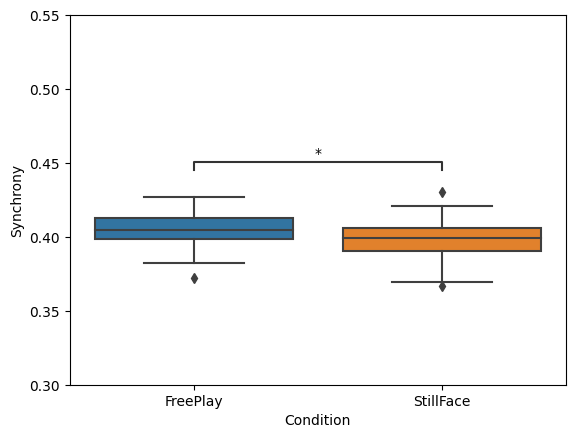

In [50]:
df2 = pd.DataFrame({"FreePlay": fp1_theta + fp2_theta,
                  "StillFace": sf1_theta + sf2_theta
                  })


# Create a multi-indexed dataframe
df_melted_a = pd.melt(df2.reset_index(), id_vars=['index'], value_vars=['FreePlay', 'StillFace'])

# Rename columns
df_melted_a.columns = ['id', 'Condition', 'Synchrony']

ax = sns.boxplot(data = df_melted_a, x = 'Condition', y = 'Synchrony')
ax.set(ylim=(0.3, 0.55))
add_stat_annotation(ax, data = df_melted_a, x = 'Condition', y = 'Synchrony', 
                    box_pairs = [('FreePlay', 'StillFace')],
                    perform_stat_test=False,
                    text_format = 'star',
                    pvalues = [0.01703514353396015]
                    )